In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D

In [203]:
# 153 Code challenge: SVD vs. eigendecomposition for squre symmetric matrices

# What is the relationship between eig and svd for a square symmetric matrix?
# Create a symmetric matrix (5x5)
# eig (W, L)
# svd (U, S, V)

# images of all matrices
# Compare U and V, and between U and W


m = 5
A = np.array( np.random.randn(m,m) )
A = np.dot(A, np.transpose(A)) # make symmetric
L, W = np.linalg.eig(A)

U, S, V = np.linalg.svd(A) # outputs V as V transpose
V = np.transpose(V)

print()
print("A:\n", A)
print()
print("W (eigenvectors):\n", W)
print()
print("L (eigenvalues):\n", L)
print()

print("U:\n", U)
print()
print("S:\n", S)
print()
print("V:\n", V)
print()

# My observations: 
    # eigenvectors (W) match U (some signs are flipped)
    # eigenvalues (L) match S exactly
    # V is the transpose of eigenvectors (W)


A:
 [[ 2.86556571  0.11567589 -0.41376402 -0.51378187  1.93237104]
 [ 0.11567589  2.96234554  1.51269913  0.62416622  0.44642133]
 [-0.41376402  1.51269913  1.82061417  0.12344469 -0.83982588]
 [-0.51378187  0.62416622  0.12344469  0.33649627  0.13918535]
 [ 1.93237104  0.44642133 -0.83982588  0.13918535  3.61672516]]

W (eigenvectors):
 [[-0.610534   -0.04898314  0.71063084  0.26579057 -0.22182894]
 [-0.00357288 -0.83466587 -0.10050887 -0.28008549 -0.46343306]
 [ 0.24367028 -0.50991114  0.33268767  0.1867507   0.73147694]
 [ 0.04630909 -0.15418482 -0.36482467  0.89794402 -0.18623104]
 [-0.75214077 -0.13096261 -0.49104343 -0.09863166  0.40777593]]

L (eigenvalues):
 [5.45091411e+00 4.07861229e+00 1.58400235e+00 1.13417148e-04
 4.88104679e-01]

U:
 [[-0.610534   -0.04898314 -0.71063084 -0.22182894  0.26579057]
 [-0.00357288 -0.83466587  0.10050887 -0.46343306 -0.28008549]
 [ 0.24367028 -0.50991114 -0.33268767  0.73147694  0.1867507 ]
 [ 0.04630909 -0.15418482  0.36482467 -0.18623104  0

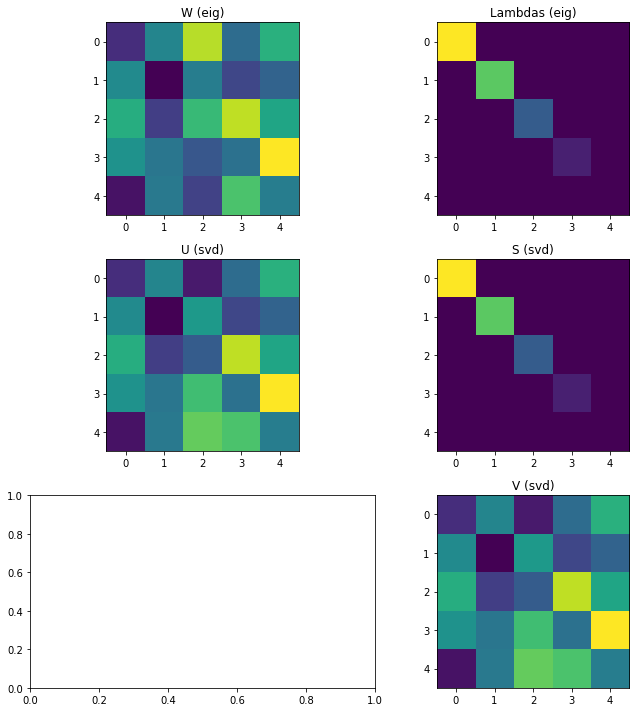

[0 1 2 4 3]
[0 1 2 3 4]

W:
 [[-0.610534   -0.04898314  0.71063084  0.26579057 -0.22182894]
 [-0.00357288 -0.83466587 -0.10050887 -0.28008549 -0.46343306]
 [ 0.24367028 -0.50991114  0.33268767  0.1867507   0.73147694]
 [ 0.04630909 -0.15418482 -0.36482467  0.89794402 -0.18623104]
 [-0.75214077 -0.13096261 -0.49104343 -0.09863166  0.40777593]]

W rearranged:
 [[-0.610534   -0.04898314  0.71063084 -0.22182894  0.26579057]
 [-0.00357288 -0.83466587 -0.10050887 -0.46343306 -0.28008549]
 [ 0.24367028 -0.50991114  0.33268767  0.73147694  0.1867507 ]
 [ 0.04630909 -0.15418482 -0.36482467 -0.18623104  0.89794402]
 [-0.75214077 -0.13096261 -0.49104343  0.40777593 -0.09863166]]

U rearranged:
 [[-0.610534   -0.04898314 -0.71063084  0.26579057 -0.22182894]
 [-0.00357288 -0.83466587  0.10050887 -0.28008549 -0.46343306]
 [ 0.24367028 -0.50991114 -0.33268767  0.1867507   0.73147694]
 [ 0.04630909 -0.15418482  0.36482467  0.89794402 -0.18623104]
 [-0.75214077 -0.13096261  0.49104343 -0.09863166  0.40

In [211]:
# setup subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax5)) = plt.subplots(3,2,figsize=(10,10))

# Create index of lambdas, descending order
sidx = (-L).argsort()
sidx_S = (-S).argsort()


# create plots
im1 = ax1.imshow(W[:, sidx])
im2 = ax2.imshow(np.diag(-np.sort(-L))) # The two "-" signs sort the array in descending order
im3 = ax3.imshow(U)
im4 = ax4.imshow(np.diag(-np.sort(-S))) # The two "-" signs sort the array in descending order
im5 = ax5.imshow(V)

# create titles
ax1.title.set_text('W (eig)')
ax2.title.set_text('Lambdas (eig)')
ax3.title.set_text('U (svd)')
ax4.title.set_text('S (svd)')
ax5.title.set_text('V (svd)')

# optimize layout for four plots
plt.tight_layout()

# shot plots
plt.show()

print(sidx)
print(sidx_S)
print()
print("W:\n",W)
print()
print("W rearranged:\n", W[:, sidx])
print()
print("U rearranged:\n", U[:, sidx])
print()
print("V rearranged:\n", V[:, sidx])
print()
print("U-V:\n", np.round(U - V, 3)) # not valid when A is rectangular
# Left singular vectors (U) and right singular vectors (V) are the same. 

print()
print("U-W:\n", np.round(U - W, 3))
print()
print("U+W:\n", np.round(U + W, 3))

In [272]:
# 154. Code challenge: U from eigendecomposition of A^TA

# 1. Create a matrix (3x6)
m = 3
n = 6
A = np.array( np.random.randn(m,n) )
#A = np.dot(A, np.transpose(A)) # make symmetric
AT = np.transpose(A)
ATA = np.dot(AT, A)
scalar = 1

# 2. Full SVD (variables Us, Ss, Vs)
Us, Ss, VTs = np.linalg.svd(A) # outputs V as V transpose
Vs = np.round(np.transpose(VTs), 3)

# 3. Eig of A'A (variables V, L)
# (Doing the eig of A'A gives you the squared singular values, not the singular values themselves.)
L, V = np.linalg.eig(ATA)
sidx = (-L).argsort()
Lorig = np.round(L, 3)
L = L[sidx]
L = np.round(np.diag(L), 3)
V = np.round(V[:, sidx], 3)
rank = np.linalg.matrix_rank(A)
print()
print("V-Vs:\n", np.round(V-Vs), 3)
print()
print("matrix rank:", rank)
print()

# 4. Confirm that V == vs 
# (Figured out that this is true for row space of matrix, but not once you get into null space. Subspace is the same,
# but the basis vectors can be different.)
print("L (eig lambda values):\n", L)
print()
print("V (eig vectors:\n", V)
print()
print("Vs (SVD):\n", Vs)

# 5. Check the relationship between Ss and L
# (Doing the eig of A'A gives you the squared singular values, not the singular values themselves.)
Ss_sq = np.round(np.square(Ss), 3) # Have to square Ss to compare it to L, or could take square root of L values.
print()
print("squared Ss:", Ss_sq)
print("L:",  Lorig)
print()

# 6. Create U using only A, V, and L (can use for loop here to loop through columns for U, if you like)

U =  np.zeros((m,m)) # mxm, see notes
for i in range(0, m):
    U[:,i] = np.dot(A, V[:,i]) / np.sqrt(Lorig[i])

print("U (built by A*Vi/Li):\n", U)


# 7. Confirm that U == Us
# (We were able to reconstruc the left singular vectors without performing SVD, 
# but by performing the eigendecomposition)

# rest of print statements
print()
print("A (original matrix):\n", A)
print()
print("Us (from SVD):\n", Us)
print()
print("Ss (from SVD):\n", Ss)
print()



V-Vs:
 [[ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -1.-0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -2.-0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j -1.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j -0.+0.j]] 3

matrix rank: 3

L (eig lambda values):
 [[ 7.667+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  3.448+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.989+0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   -0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j -0.   +0.j]]

V (eig vectors:
 [[-0.636+0.j    -0.583+0.j    -0.245+0.j     0.088+0.129j  0.088-0.129j
  -0.048+0.j   ]
 [ 0.056+0.j    -0.386+0.j     0.751+0.j    -0.44 +0.077j -0.44 -0.077j
  -0.386+0.j   ]
 [-0.224+0.j     0.192+0.j    -

C:\Users\amiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part


In [19]:
# 155. Code Challenge: A^TA, Av, and singular vectors

'''
Prove the unproven claims.

Assumptions:
1. u is a left singular vector of AtA.
2. Sigma is the corresponding singular value.

Claim:
1. Av is a right singular vector of AAt.
2. Sigma is the corresponding singular value.
'''

m = 4
A = np.array( np.random.randn(m,m) )
AtA = np.dot(np.transpose(A), A)
AAt = np.dot(A, np.transpose(A))
U, S, Vt = np.linalg.svd(AtA) # outputs "V" as V transpose (Vt)
V = np.transpose(Vt)

AAtAU = np.dot(AAt, A)

for i in range(0, m):
    AAtAU = np.dot(AAt, A)
    AAtAU = np.dot(AAtAU, U[:,i]) # U[:,i] -> left singular vector
    AU = np.dot(A,U[:,i]) * S[i]
    zero = sum((AAtAU - AU) **2)

print()
print("A:\n", A)
print()
print("AtA:\n", AtA)
print()
print("AAt:\n", AAt)
print()
print("U:\n", U)
print()
print("S:\n", S)
print()
print("V:\n", V)
print()
print("AAtAU:\n", AAtAU)
print()
print("AU:\n", AU)
print()
print("AAtAU - AU:\n", zero)
print()



A:
 [[ 0.15948943 -1.44150111 -0.08419145  0.25240948]
 [ 0.42739826  0.99750135  0.10698121 -0.3879296 ]
 [ 0.05338395 -0.68416725 -2.08968273  0.87172784]
 [ 0.26066258 -0.25245521 -1.23972684 -0.45829222]]

AtA:
 [[ 0.27890098  0.09409698 -0.40240998 -0.19846715]
 [ 0.09409698  3.60475285  1.97074396 -1.23151822]
 [-0.40240998  1.97074396  5.92222972 -1.31622934]
 [-0.19846715 -1.23151822 -1.31622934  1.1841411 ]]

AAt:
 [[ 2.17416106 -1.4766578   1.39070781  0.39418448]
 [-1.4766578   1.33961257 -1.22136737 -0.09526004]
 [ 1.39070781 -1.22136737  5.597618    2.37776646]
 [ 0.39418448 -0.09526004  2.37776646  1.87863301]]

U:
 [[-0.03207437 -0.14387887 -0.386157    0.91057832]
 [ 0.49568897 -0.80042693  0.33541759  0.0332297 ]
 [ 0.82615233  0.54246352  0.05971957  0.14014004]
 [-0.26596241  0.21059187  0.8572114   0.38743216]]

S:
 [7.5440258  2.61007067 0.69996876 0.13595941]

V:
 [[-0.03207437 -0.14387887 -0.386157    0.91057832]
 [ 0.49568897 -0.80042693  0.33541759  0.0332297 

In [34]:
# Code challenge: When is UV^T valid, what is its norm, and is it orgthogonal.
'''
-Going to explore the relationship between U and V^T from the SVD and in particular determine when the conditions
under which U and V^T can be multiplied and what the resulting matrix is like.
-Think about what is the condition on matrix A such that it is possible to multiple U x V^T.
- What is the norm of that matrix, that magnitude. 
- We already know norm U and V^T is 1.
'''
# Generate a matrix such that U*V' is valid (think about the conditions on matrix A)
# Compute norm of U, norm of V, and the norm of U*V'
# Test for U*U', V*V', U*V'

m = 4 # must be square
A = np.array( np.random.randn(m,m) )
U, S, Vt = np.linalg.svd(A) # outputs "V" as V transpose (Vt)
V = np.transpose(Vt)
Unorm = np.linalg.norm(U, ord=1)
Vnorm = np.linalg.norm(V)
Ut = np.transpose(U)
UUt = np.dot(U, Ut)
VVt = np.dot(V, Vt)
UVt = np.dot(U, Vt)
UVtnorm = np.linalg.norm(UVt)

print()
print("A:\n", A)
print()
print("U:\n", U)
print()
print("S:\n", S)
print()
print("V:\n", V)
print()
print("Unorm:\n", Unorm)
print()
print("Vnorm:\n", Vnorm)
print()
print("UVtnorm:\n", UVtnorm)
print()
print("UUt:\n", UUt)
print()
print("VVt:\n", VVt)
print()
print("UVt:\n", UVt)

'''
Notes:
- U and V are pure rotation matrices.
- Could try scikit-learn for normalize to 1.
- U and V are orthoganal matrices.
- UV' does not produce identity matrix.
'''


A:
 [[-0.50305251  2.25836339 -1.72598605  0.09732431]
 [ 1.05368197  0.35661816  0.25672795  0.56115295]
 [ 1.48008249  0.81223459  1.35529571  0.04107436]
 [ 1.32276556 -0.67141649 -0.10664389 -0.26335278]]

U:
 [[-0.86080326 -0.45429251  0.19228694  0.12514711]
 [ 0.15234032 -0.45263656  0.1731831  -0.86134789]
 [ 0.36580923 -0.75333706 -0.39082827  0.38199495]
 [ 0.31936466 -0.1456768   0.88333833  0.31064107]]

S:
 [3.10511304 2.34838078 1.21514474 0.54489828]

V:
 [[ 0.50156625 -0.66262646  0.55609912  0.01054699]
 [-0.58193792 -0.7245216  -0.34112655  0.14159584]
 [ 0.63977246 -0.14374197 -0.74996346  0.08708763]
 [-0.02169681 -0.12382596 -0.10927605 -0.98602998]]

Unorm:
 1.8059429334000852

Vnorm:
 1.9999999999999996

UVtnorm:
 1.9999999999999996

UUt:
 [[ 1.00000000e+00 -1.11022302e-16 -1.11022302e-16  6.93889390e-17]
 [-1.11022302e-16  1.00000000e+00 -1.89084859e-16 -1.11022302e-16]
 [-1.11022302e-16 -1.89084859e-16  1.00000000e+00 -2.77555756e-16]
 [ 6.93889390e-17 -1.1102

In [26]:
# 163. Code challenge: Create matrix with desired condition number

# Create a random matrix with a specified condition number.

m = 16
n = 6
condnum = 41.99

# Create singular vectors matrices. Need to be orthogonal, use QRD.
U, junk = np.linalg.qr(np.array( np.random.randn(m,m) ))
V, junk = np.linalg.qr(np.array( np.random.randn(n,n) ))
Ut = np.transpose(U)
Vt = np.transpose(V)

UUt = np.dot(U, Ut) # for proof - result should be orthogonal, this should give you the identity matrix 
print()
print("UUt:\n", np.round(UUt, 0))
print()

# Create the singular values matrix
s = np.linspace(condnum, 1, min(m,n)) # this gives us the vector of singular value
S = np.zeros((m,n))

for i in range(0, len(s)):
    S[i,i] = s[i]
    
print("S:\n", np.round(S, 3))
print()
print("s:\n", np.round(s, 3))
print()


# Create the matrix
A = U @ S @ Vt
#A = np.dot(U, S)
#A = np.dot(A, Vt)
print("A:\n", np.round(A, 3))
print()
print("Acond:\n", np.linalg.cond(A))
print()
    


UUt:
 [[ 1.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
 [-0.  0.  1. -0. -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.]
 [-0.  0. -0.  1.  0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0. -0.]
 [-0.  0. -0.  0.  1. -0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.]
 [-0. -0.  0.  0. -0.  1. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  1. -0. -0. -0.  0.  0. -0. -0.  0.  0.]
 [ 0.  0. -0.  0. -0.  0. -0.  1. -0.  0.  0. -0.  0. -0. -0.  0.]
 [-0. -0. -0.  0.  0.  0. -0. -0.  1.  0. -0. -0.  0.  0.  0. -0.]
 [ 0. -0. -0. -0. -0. -0. -0.  0.  0.  1.  0. -0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  1. -0.  0. -0. -0.  0.]
 [-0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  1. -0. -0. -0.  0.]
 [-0.  0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  1.  0.  0. -0.]
 [ 0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  1.  0. -0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0.  